<a href="https://colab.research.google.com/github/LauraWangQiu/GPUs/blob/main/src/lab4/Jupyter-notebooks/ejercicio_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento del dataset mnist
* Clasificación de un problema de escritura con **MNIST dataset** [^1]
* Cargamos el dataset importando con *mnist.load_data()*

![MNIST example](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png) Source: Wikipedia.


[^1]: https://en.wikipedia.org/wiki/MNIST_database

# Ejercicio
* Creación de nueva red neuronal y su evaluación para el dataset MNIST

![CNN example](https://drive.google.com/uc?id=1dpyEYquPdWkl8cFbvECYP87bYgpamGq9)

2025-05-02 02:17:50.887836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746145072.652065   42288 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746145073.149966   42288 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746145075.049533   42288 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746145075.049559   42288 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746145075.049561   42288 computation_placer.cc:177] computation placer alr

Num GPUs Available:  1
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


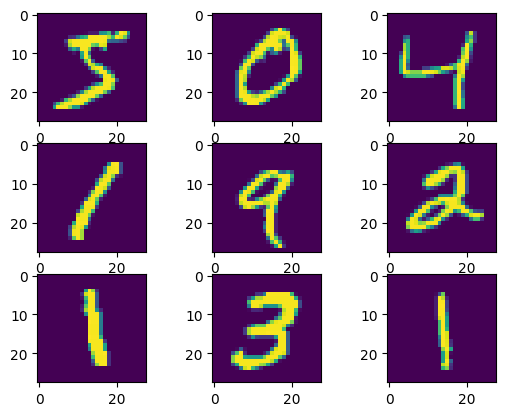

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/mnt/c/Users/lwq20/OneDrive/Documentos/GitHub/GPUs/src/lab4/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746145125.054203   42288 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3773 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        48,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,933 (234.11 KB)

 Trainable params: 59,933 (234.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1746145136.190034   42576 service.cc:152] XLA service 0x7f6758006d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746145136.190240   42576 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2025-05-02 02:18:56.271475: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746145136.635019   42576 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-05-02 02:18:57.634665: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.6 = (f32[128,30,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,28,28]{3,2,1,0} %bitcast.4516, f32[30,1,5,5]{3,2,1,0} %bitcast.4523, f32[30]{0} %bitcast.4994), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$co

 17/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1889 - loss: 2.2583

I0000 00:00:1746145140.683816   42576 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7738 - loss: 0.7227

2025-05-02 02:19:04.201557: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.6 = (f32[96,30,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[96,1,28,28]{3,2,1,0} %bitcast.4516, f32[30,1,5,5]{3,2,1,0} %bitcast.4523, f32[30]{0} %bitcast.4994), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/mnt/c/Users/lwq20/OneDrive/Documentos/GitHub/GPUs/src/lab4/venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-02 02:19:04.249415: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7762 - loss: 0.7151

2025-05-02 02:19:07.176957: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.6 = (f32[128,30,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,28,28]{3,2,1,0} %bitcast.528, f32[30,1,5,5]{3,2,1,0} %bitcast.535, f32[30]{0} %bitcast.537), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/mnt/c/Users/lwq20/OneDrive/Documentos/GitHub/GPUs/src/lab4/venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-02 02:19:07.262415: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.7765 - loss: 0.7142 - val_accuracy: 0.9797 - val_loss: 0.0627
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9714 - loss: 0.0917 - val_accuracy: 0.9866 - val_loss: 0.0440
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9802 - loss: 0.0635 - val_accuracy: 0.9888 - val_loss: 0.0378
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9847 - loss: 0.0504 - val_accuracy: 0.9908 - val_loss: 0.0292
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9870 - loss: 0.0421 - val_accuracy: 0.9908 - val_loss: 0.0275
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9918 - val_loss: 0.0250
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9884 - loss: 0.0366 - val_accuracy: 0.9926 - val_loss: 0.0230
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9910 - loss: 0.0302 - val_accuracy: 0.9913 - va

2025-05-02 02:19:37.479312: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.6 = (f32[32,30,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0} %bitcast.528, f32[30,1,5,5]{3,2,1,0} %bitcast.535, f32[30]{0} %bitcast.537), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/mnt/c/Users/lwq20/OneDrive/Documentos/GitHub/GPUs/src/lab4/venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-02 02:19:37.503382: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_pi

Test loss: 0.022812362760305405
Test accuracy: 0.9932000041007996


2025-05-02 02:19:39.359206: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.6 = (f32[1,30,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,1,28,28]{3,2,1,0} %bitcast.222, f32[30,1,5,5]{3,2,1,0} %bitcast.229, f32[30]{0} %bitcast.231), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/mnt/c/Users/lwq20/OneDrive/Documentos/GitHub/GPUs/src/lab4/venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-02 02:19:39.374081: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_pick

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


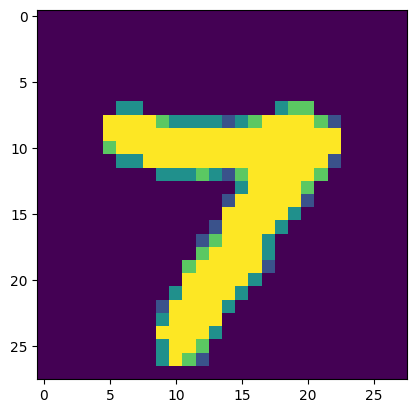

Predicted: 7; Exact label: 7


2025-05-02 02:19:40.207671: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.


x_train_resized shape: (60000, 32, 32, 3)
x_test_resized shape: (10000, 32, 32, 3)


Model: "mobilenet_1.00_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 3,217,226 (12.27 MB)

 Non-trainable params: 21,888 (85.50 KB)

2025-05-02 02:19:46.966576: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 737280000 exceeds 10% of free system memory.
2025-05-02 02:19:52.508607: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 737280000 exceeds 10% of free system memory.


Epoch 1/10


2025-05-02 02:20:09.323468: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:20:09.595452: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:20:09.916670: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:20:09.963995: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv %cudnn-conv.99 = (f32[128,1024,1,1]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1024,1,1]{3,2,1,0} %bitcast.23788, f32[1024,1,3,3]{3,2,1,0} %bitcast.22577), window={size=3x

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6765 - loss: 0.9873

2025-05-02 02:20:38.285509: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:20:38.568951: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:20:38.827383: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv %cudnn-conv.99 = (f32[96,1024,1,1]{3,2,1,0}, u8[0]{0}) custom-call(f32[96,1024,1,1]{3,2,1,0} %bitcast.23788, f32[1024,1,3,3]{3,2,1,0} %bitcast.22577), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=1024, custom_call_target="__cudnn$convForward", metadata={op_type="DepthwiseConv2dNative" op_name="mobilenet_1.00_32_1/conv_dw_13_1/depthwise" source_file="/mnt/c/Users/lwq2

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6780 - loss: 0.9830

2025-05-02 02:20:59.146297: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:20:59.434740: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:20:59.717625: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:20:59.781423: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv %cudnn-conv.59 = (f32[16,1024,1,1]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,1024,1,1]{3,2,1,0} %bitcast.3815, f32[1024,1,3,3]{3,2,1,0} %bitcast.3819), window={size=3x3 pa

469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 80ms/step - accuracy: 0.6783 - loss: 0.9819 - val_accuracy: 0.1135 - val_loss: 2.3575
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9681 - loss: 0.1139 - val_accuracy: 0.9741 - val_loss: 0.1116
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9808 - loss: 0.0687 - val_accuracy: 0.9807 - val_loss: 0.0827
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9863 - loss: 0.0480 - val_accuracy: 0.9849 - val_loss: 0.0623
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9891 - loss: 0.0385 - val_accuracy: 0.9845 - val_loss: 0.0730
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9907 - loss: 0.0318 - val_accuracy: 0.9893 - val_loss: 0.0476
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9927 - loss: 0.0246 - val_accuracy: 0.9891 - val_loss: 0.0365
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9935 - loss: 0.0227 - val_accuracy: 0.98

2025-05-02 02:22:29.347384: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:22:29.721570: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-02 02:22:29.727642: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv %cudnn-conv.59 = (f32[32,1024,1,1]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1024,1,1]{3,2,1,0} %bitcast.3815, f32[1024,1,3,3]{3,2,1,0} %bitcast.3819), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=1024, custom_call_target="__cudnn$convForward", metadata={op_type="DepthwiseConv2dNative" op_name="mobilenet_1.00_32_1/conv_dw_13_1/depthwise" source_file="/mnt/c/Users/lwq20/

Test loss: 0.04838704690337181
Test accuracy: 0.988099992275238


/mnt/c/Users/lwq20/OneDrive/Documentos/GitHub/GPUs/src/lab4/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 54s 85ms/step - accuracy: 0.8873 - loss: 0.4210 - val_accuracy: 0.9811 - val_loss: 0.0738
Epoch 2/100
  1/468 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 1.0000 - loss: 0.0388

/mnt/c/Users/lwq20/OneDrive/Documentos/GitHub/GPUs/src/lab4/venv/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0388 - val_accuracy: 0.9806 - val_loss: 0.0766
Epoch 3/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9620 - loss: 0.1278 - val_accuracy: 0.9821 - val_loss: 0.0593
Epoch 4/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9609 - loss: 0.1007 - val_accuracy: 0.9756 - val_loss: 0.0794
Epoch 5/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9705 - loss: 0.0985 - val_accuracy: 0.9798 - val_loss: 0.0669
Epoch 6/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9922 - loss: 0.0449 - val_accuracy: 0.9804 - val_loss: 0.0647
Epoch 7/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9732 - loss: 0.0914 - val_accuracy: 0.9889 - val_loss: 0.0346
Epoch 8/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9688 - loss: 0.0716 - val_accuracy: 0.9872 - val_loss: 0.0427
Epoch 9/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9766 - loss: 0.0797 - val_accuracy

In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.applications import MobileNet
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

# PREPARING DATASET

# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train /= 255
x_test /= 255

# only one channel because dataset is grayscale
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# CNN CREATION

model = Sequential()
# only one channel because dataset is grayscale
model.add(Conv2D(30, (5, 5), input_shape=(img_rows, img_cols, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Dropout(0.2))  # Let's try to avoid overfitting...
model.add(Flatten())
    
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
    
# Compile model:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo creado
model.summary()

# TRAINING

epochs = 10
batch_size = 128

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# EVALUATION

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# PREDICTION

id_random = random.randint(0,x_test.shape[0])

test_im = x_test[id_random]

# only one channel because dataset is grayscale
pred = model.predict(test_im.reshape(1,img_rows, img_cols,1), batch_size=1, verbose=1)

imgplot = plt.imshow(test_im)  
plt.show()
print("Predicted: " + str(np.argmax(pred)) +"; Exact label: " + str(np.argmax(y_test[id_random])))

# MOBILENET EVALUATION

# MobileNet needs a minimum size of 32x32 pixels
x_train_resized = tf.image.resize(x_train, (32, 32)).numpy()
x_test_resized = tf.image.resize(x_test, (32, 32)).numpy()
x_train_resized = np.repeat(x_train_resized, 3, axis=-1)
x_test_resized = np.repeat(x_test_resized, 3, axis=-1)

print('x_train_resized shape:', x_train_resized.shape)
print('x_test_resized shape:', x_test_resized.shape)

input_shape=(32, 32, 3)
modelDL = MobileNet(weights=None, classes=num_classes, input_shape=input_shape)

modelDL.summary()

opt_rms = RMSprop(learning_rate=0.001,weight_decay=1e-6)
modelDL.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

# Training
epochs = 10
batch_size = 128

modelDL.fit(x_train_resized, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_resized, y_test))

# modelDL.save_weights("weightsMobileNet_mnist.weights.h5")
modelDL.load_weights("weightsMobileNet_mnist_downloaded.h5")

# Evaluation
score = modelDL.evaluate(x_test_resized, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# OTHER CONSIDERATIONS

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,   # randomly flip images
    vertical_flip=False,    # randomly flip images
    rescale=None,           # set rescaling factor (applied before any other transformation)
)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train_resized)

# Training
epochs = 100
batch_size = 128 

# Fit the model on the batches generated by datagen.flow().
modelDL.fit(datagen.flow(x_train_resized, y_train,
                                   batch_size=batch_size),
          steps_per_epoch=int(len(x_train_resized)/batch_size),
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_resized, y_test))
